# Author : Chetan Borate
## GRIP @ The Sparks Foundation
### Prediction using Decision Tree Algorithm

Creating Decision Tree classifier and visualize it graphically.

#### Importing libraries in Python

In [38]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd\



# Loading the iris dataset
mydata = pd.read_csv("Iris.csv",index_col="Id")
print(mydata.head(10))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
6             5.4           3.9            1.7           0.4  Iris-setosa
7             4.6           3.4            1.4           0.3  Iris-setosa
8             5.0           3.4            1.5           0.2  Iris-setosa
9             4.4           2.9            1.4           0.2  Iris-setosa
10            4.9           3.1            1.5           0.1  Iris-setosa


In [6]:
print("size:",mydata.size)
print("shape:",mydata.shape)
print(mydata["Species"].value_counts())
print(mydata.info())

size: 750
shape: (150, 5)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


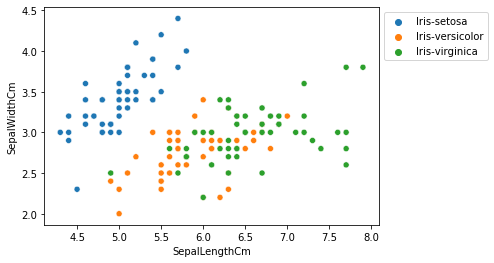

In [8]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',hue='Species', data=mydata, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

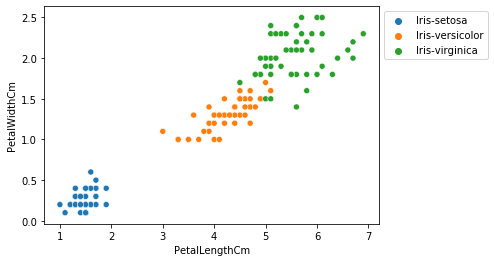

In [10]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',hue='Species', data=mydata, )
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

#### Importing Classifiers

In [29]:
from sklearn import tree , metrics
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
print("Classifiers Imported")

Classifiers Imported


In [30]:
X = mydata[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = mydata['Species']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.40, random_state=0)

In [31]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
Y_pred=Iris_clf.predict(Xtest)

print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(Y_pred,Ytest)))


The accuracy of the Decision Tree is 0.950


#### The Decision Tree

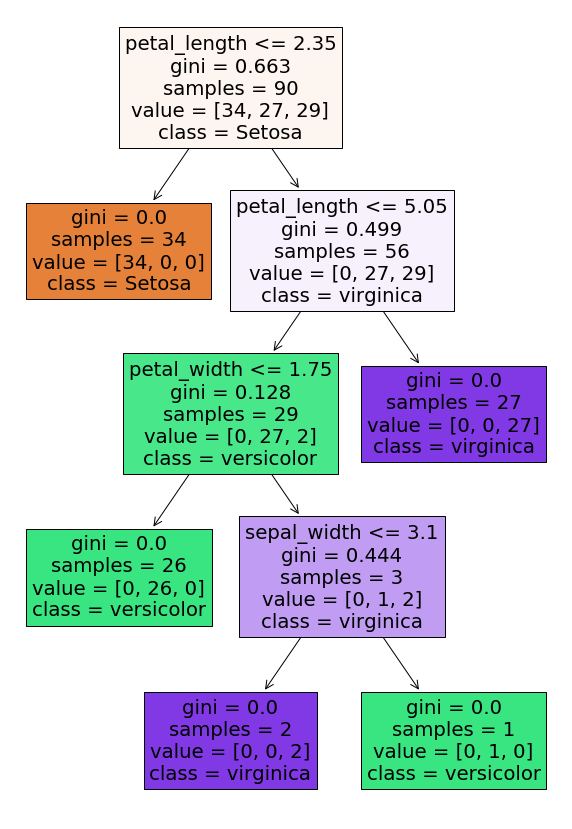

In [33]:
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Setosa', 'versicolor', 'virginica']
plt.figure(figsize = (10,15))
plot_tree(Iris_clf, feature_names = fn, class_names = cn, filled = True);

### Making Predictions 

In [34]:
def predict_input(Iris_clf, single_input):
    X_input = pd.DataFrame([single_input])
    pred = Iris_clf.predict(X_input)[0]
    prob = Iris_clf.predict_proba(X_input)[0][list(Iris_clf.classes_).index(pred)]
    return pred, prob

In [35]:
new_input = {'SepalLengthCm' : 4.3,
             'SepalWidthCm' : 3.6,
             'PetalLengthCm': 1.3,
             'PetalWidthCm' : 0.2}

In [36]:
predict_input(Iris_clf, new_input)

('Iris-setosa', 1.0)